In [1]:
import pandas as pd
sheet= pd.read_excel("Portfolio.xlsx")

In [2]:
sheet

,Date,Portfolio Value,Holding Period Yield
0,20120301,100.000000,0.000000
1,20120405,92.828962,-0.071710
2,20120502,95.159654,0.025107
3,20120601,92.778299,-0.025025
4,20120702,96.267772,0.037611
...,...,...,...
89,20190801,374.826724,-0.011650
90,20190902,489.800117,0.306737
91,20191008,425.460843,-0.131358
92,20191101,406.015376,-0.045704


In [3]:
import tushare as ts
import matplotlib.pyplot as plt 
import numpy as np

token='afdb4bc7f87218403bc788b6f31f24d9f4505e38746eff8a44771719'
pro= ts.pro_api(token)
df=pro.index_daily(ts_code="000300.SH", start_date='20050104')

#603988.SH   

#000016.SH   000300.SH    '20050104'


C=df['close']
C=np.array(C)
J=[0]
for i in range(1,len(C)+1):
    j=C[-i]
    J=np.vstack((J,j))
J=J[1:]

O=df['open']
O=np.array(O)
K=[0]
for i in range(1,len(O)+1):
    k=O[-i]
    K=np.vstack((K,k))
K=K[1:]

L=df['low']
L=np.array(L)
M=[0]
for i in range(1,len(L)+1):
    m=L[-i]
    M=np.vstack((M,m))
M=M[1:]

H=df['high']
H=np.array(H)
N=[0]
for i in range(1,len(H)+1):
    n=H[-i]
    N=np.vstack((N,n))
N=N[1:]

T=df['trade_date']
T=np.array(T)
Q=[0]
for i in range(1,len(T)+1):
    q=T[-i]
    Q=np.vstack((Q,q))
Q=Q[1:]
df=pd.DataFrame(df['ts_code'])

df.insert(1,'date',Q) 
df.insert(2,'open',K)
df.insert(3,'high',N)
df.insert(4,'low',M)
df.insert(5,'close',J)

In [4]:
df

,ts_code,date,open,high,low,close
0,000300.SH,20050104,994.7690,994.7690,980.6580,982.7940
1,000300.SH,20050105,981.5770,997.3230,979.8770,992.5640
2,000300.SH,20050106,993.3310,993.7880,980.3300,983.1740
3,000300.SH,20050107,983.0450,995.7110,979.8120,983.9580
4,000300.SH,20050110,983.7600,993.9590,979.7890,993.8790
...,...,...,...,...,...,...
3699,000300.SH,20200325,3711.4753,3732.6536,3685.9942,3722.5181
3700,000300.SH,20200326,3692.6083,3736.2536,3681.2668,3698.0472
3701,000300.SH,20200327,3746.3914,3758.7827,3709.9213,3710.0605
3702,000300.SH,20200330,3657.4624,3690.6388,3637.5853,3674.1108


In [5]:
len(df)

3704

In [6]:
[int(df["date"][0])]

[20050104]

In [7]:
HS=[0]
for i in sheet["Date"]:
    #print(i)
    for j in range(len(df)):
        if int(df["date"][j])==i:
            HS=np.vstack((HS,df["close"][j]))
            #print(df["close"][j])


In [8]:
HS=HS[1:]

In [9]:
sheet.insert(2,'HS300',HS)

In [10]:
zero=np.array([0])
#print(zero.shape)


rt=np.diff(np.array(sheet["HS300"]))
rt=np.hstack((zero,rt))
rt=rt/np.array(sheet["HS300"])
sheet.insert(3,'HS300_return',rt)

In [11]:
sheet

,Date,Portfolio Value,HS300,HS300_return,Holding Period Yield
0,20120301,100.000000,2633.3450,0.000000,0.000000
1,20120405,92.828962,2512.8320,-0.047959,-0.071710
2,20120502,95.159654,2683.4870,0.063594,0.025107
3,20120601,92.778299,2632.9980,-0.019175,-0.025025
4,20120702,96.267772,2465.2380,-0.068050,0.037611
...,...,...,...,...,...
89,20190801,374.826724,3803.4694,-0.034795,-0.011650
90,20190902,489.800117,3848.3198,0.011655,0.306737
91,20191008,425.460843,3837.6791,-0.002773,-0.131358
92,20191101,406.015376,3952.3872,0.029022,-0.045704


In [12]:
j=0
J=[0]
for i in sheet["HS300_return"]:
    j=j+i
    J=np.vstack((J,j))
J=J[1:]

In [13]:
k=0
K=[0]
for i in sheet["Holding Period Yield"]:
    k=k+i
    K=np.vstack((K,k))
K=K[1:]

Text(0, 0.5, 'Accumulated return')

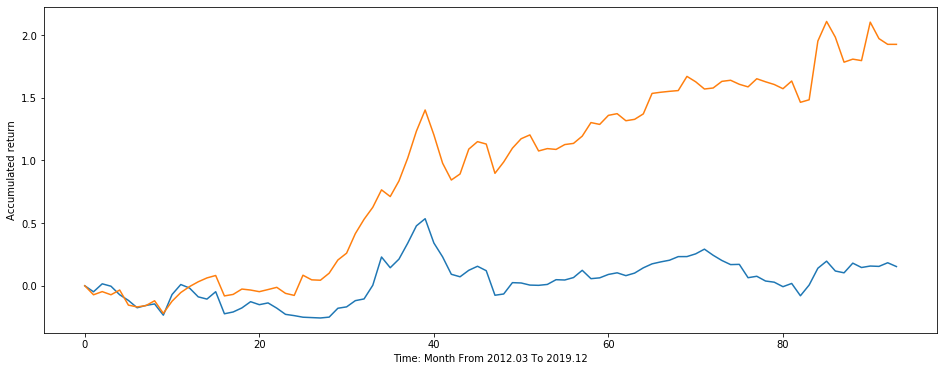

In [14]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 6) 
plt.plot(J,label='HS300 accumulated return')
plt.plot(K,label='Portfolio accumulated return')
plt.xlabel('Time: Month From 2012.03 To 2019.12')
plt.ylabel('Accumulated return')


Text(0, 0.5, 'Accumulated return of Startegy via Long portfolio and Short HS300')

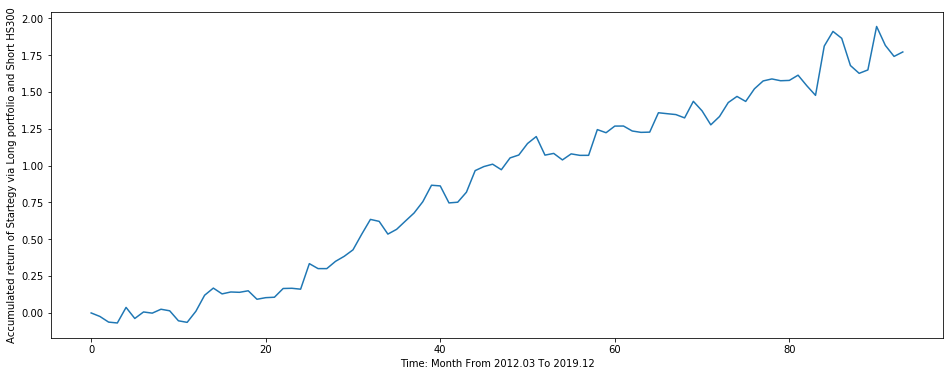

In [15]:
plt.plot(K-J)   #Startegy of Long portfolio and Short HS300
plt.xlabel('Time: Month From 2012.03 To 2019.12')
plt.ylabel('Accumulated return of Startegy via Long portfolio and Short HS300')

In [16]:
Year_return_HS300=J[-1]*12/len(J)
Year_return_Portfolio=K[-1]*12/len(K)
Year_return_Strategy=(K[-1]-J[-1])*12/len(K)

print("Annual return of HS300=",Year_return_HS300)
print("Annual return of Portfolio=",Year_return_Portfolio)
print("Annual return of Startegy of Long Portfolio and Short HS300=",Year_return_Strategy)

Annual return of HS300= [0.01956482]
Annual return of Portfolio= [0.24576758]
Annual return of Startegy of Long Portfolio and Short HS300= [0.22620277]


In [17]:
#imformation ratio

IF_Portfolio=((K[-1]/len(K))-(J[-1]/len(J)))/np.std(sheet["Holding Period Yield"]-sheet["HS300_return"])

print("information ratio of Portfolio=",IF_Portfolio)


information ratio of Portfolio= [0.24083469]


In [18]:
#sharp ratio 
Rf=0.04         #suppose annual risk free rate is 0.04


Sharp_Portfolio=((K[-1]/len(K)*12)-Rf)/(np.std(sheet["Holding Period Yield"])*np.sqrt(12))

Sharp_HS300=((J[-1]/len(J)*12)-Rf)/(np.std(sheet["HS300_return"])*np.sqrt(12))

Sharp_Startegy=((K[-1]-J[-1])/len(J)*12-Rf)/(np.std(sheet["Holding Period Yield"]-sheet["HS300_return"])*np.sqrt(12))

print("Sharp ratio of Portfolio=",IF_Portfolio)
print("Sharp ratio of benchmark HS300=",Sharp_HS300)
print("Sharp ratio of Startegy of Long Portfolio and Short HS300=",Sharp_Startegy)

Sharp ratio of Portfolio= [0.24083469]
Sharp ratio of benchmark HS300= [-0.08608367]
Sharp ratio of Startegy of Long Portfolio and Short HS300= [0.68674876]


In [19]:
# Monthly Maximum drawdown
print("Monthly Maximum drawdown of Portfolio=",min(sheet["Holding Period Yield"]))
print("Monthly Maximum drawdown of HS300=",min(sheet["HS300_return"]))
print("Monthly Maximum drawdown of Long Portfolio and Short HS300=",min(sheet["Holding Period Yield"]-sheet["HS300_return"]))

Monthly Maximum drawdown of Portfolio= -0.233451901225402
Monthly Maximum drawdown of HS300= -0.19579771128892506
Monthly Maximum drawdown of Long Portfolio and Short HS300= -0.1849055793403728
